## Principal Component Analysis for NBA Stats

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from path import Path
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### Preprocessing the Data for PCA

In [2]:
# Load the NBA Stats dataset
file_path = 'Resources/dataset_clean.csv'
a_df = pd.read_csv(file_path)
a_df.head(10)

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch)
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,...,6,3,7,26,57,1998,223,1974,6,78.0
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,...,87,38,212,240,1608,1997,225,1976,7,81.0
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,...,68,37,184,222,1384,1997,225,1976,8,81.0
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,...,49,26,117,150,909,1997,225,1976,9,81.0
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,...,48,42,108,227,887,1997,225,1976,10,81.0
5,2007,Shareef Abdur-Rahim,30,80,2015,13.1,0.524,0.031,0.358,7.0,...,53,40,116,243,793,1997,225,1976,11,81.0
6,2003,Courtney Alexander,25,66,1360,9.3,0.459,0.113,0.289,3.3,...,31,6,68,125,523,2001,205,1977,3,77.0
7,2003,Malik Allen,24,80,2318,9.9,0.455,0.005,0.153,6.5,...,37,78,128,234,767,2002,255,1978,2,82.0
8,2004,Malik Allen,25,45,616,10.5,0.449,0.000,0.167,7.9,...,12,28,27,81,191,2002,255,1978,3,82.0
9,2005,Malik Allen,26,36,519,14.2,0.512,0.000,0.158,9.0,...,9,22,18,53,194,2002,255,1978,4,82.0


In [3]:
# List columns 
a_df.columns

Index(['Year', 'Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA',
       '2P', '2PA', 'eFG%', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'year_start', 'weight', 'year_born',
       'Status', 'height(inch)'],
      dtype='object')

In [4]:
pd.set_option('max_columns', 500)

a_df.head(10)

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch)
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,1974,6,78.0
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,1976,7,81.0
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,1976,8,81.0
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,1976,9,81.0
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,1976,10,81.0
5,2007,Shareef Abdur-Rahim,30,80,2015,13.1,0.524,0.031,0.358,7.0,16.4,11.6,9.2,1.3,1.5,13.3,19.5,1.1,1.7,2.8,0.067,-2.1,0.0,-2.1,-0.1,310,654,3,20,307,634,0.476,170,234,122,276,398,109,53,40,116,243,793,1997,225,1976,11,81.0
6,2003,Courtney Alexander,25,66,1360,9.3,0.459,0.113,0.289,3.3,6.8,5.0,9.8,1.2,0.3,10.7,21.3,0.1,1.0,1.1,0.040,-3.2,-2.3,-5.5,-1.2,193,505,19,57,174,448,0.401,118,146,39,79,118,79,31,6,68,125,523,2001,205,1977,3,77.0
7,2003,Malik Allen,24,80,2318,9.9,0.455,0.005,0.153,6.5,14.9,10.6,4.4,0.9,2.6,13.2,19.7,-1.7,2.6,0.9,0.018,-4.6,0.6,-3.9,-1.1,335,790,0,4,335,786,0.424,97,121,134,291,425,54,37,78,128,234,767,2002,255,1978,2,82.0
8,2004,Malik Allen,25,45,616,10.5,0.449,0.000,0.167,7.9,14.7,11.3,4.7,1.1,3.6,11.3,18.3,-0.1,0.8,0.7,0.051,-4.7,0.2,-4.6,-0.4,83,198,0,0,83,198,0.419,25,33,42,77,119,16,12,28,27,81,191,2002,255,1978,3,82.0
9,2005,Malik Allen,26,36,519,14.2,0.512,0.000,0.158,9.0,13.3,11.0,5.7,0.9,3.2,8.7,18.1,0.6,0.5,1.1,0.100,-2.0,-0.3,-2.3,0.0,84,177,0,0,84,177,0.475,26,28,40,59,99,18,9,22,18,53,194,2002,255,1978,4,82.0


In [5]:
# Verify datatypes
a_df.dtypes

Year              int64
Player           object
Age               int64
G                 int64
MP                int64
PER             float64
TS%             float64
3PAr            float64
FTr             float64
ORB%            float64
DRB%            float64
TRB%            float64
AST%            float64
STL%            float64
BLK%            float64
TOV%            float64
USG%            float64
OWS             float64
DWS             float64
WS              float64
WS/48           float64
OBPM            float64
DBPM            float64
BPM             float64
VORP            float64
FG                int64
FGA               int64
3P                int64
3PA               int64
2P                int64
2PA               int64
eFG%            float64
FT                int64
FTA               int64
ORB               int64
DRB               int64
TRB               int64
AST               int64
STL               int64
BLK               int64
TOV               int64
PF              

In [6]:
# Create a new DataFrame that holds only the player names.
player_name = pd.DataFrame(a_df['Player'])

print(player_name.shape)
player_name.head(10)

(6273, 1)


,Player
0,Tariq Abdul-Wahad
1,Shareef Abdur-Rahim
2,Shareef Abdur-Rahim
3,Shareef Abdur-Rahim
4,Shareef Abdur-Rahim
5,Shareef Abdur-Rahim
6,Courtney Alexander
7,Malik Allen
8,Malik Allen
9,Malik Allen


In [7]:
a_df.head()

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch)
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,1974,6,78.0
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,1976,7,81.0
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,1976,8,81.0
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,1976,9,81.0
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,1976,10,81.0


In [36]:
# Drop unused columns
df = a_df.drop(['Player', 'year_born', 'Year', 'year_start', 'Status', 'OWS', 'DWS', 'WS', 'WS/48', 'VORP', 'PER'], axis=1)
df.head(10)

,Age,G,MP,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OBPM,DBPM,BPM,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,height(inch)
0,28,14,204,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,-1.2,0.7,-0.5,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,223,78.0
1,26,81,3087,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,2.1,-0.4,1.7,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,225,81.0
2,27,85,2684,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,1.3,-1.0,0.3,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,225,81.0
3,28,54,1867,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,1.4,-0.5,0.8,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,225,81.0
4,29,72,1961,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,0.4,0.4,0.9,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,225,81.0
5,30,80,2015,0.524,0.031,0.358,7.0,16.4,11.6,9.2,1.3,1.5,13.3,19.5,-2.1,0.0,-2.1,310,654,3,20,307,634,0.476,170,234,122,276,398,109,53,40,116,243,793,225,81.0
6,25,66,1360,0.459,0.113,0.289,3.3,6.8,5.0,9.8,1.2,0.3,10.7,21.3,-3.2,-2.3,-5.5,193,505,19,57,174,448,0.401,118,146,39,79,118,79,31,6,68,125,523,205,77.0
7,24,80,2318,0.455,0.005,0.153,6.5,14.9,10.6,4.4,0.9,2.6,13.2,19.7,-4.6,0.6,-3.9,335,790,0,4,335,786,0.424,97,121,134,291,425,54,37,78,128,234,767,255,82.0
8,25,45,616,0.449,0.000,0.167,7.9,14.7,11.3,4.7,1.1,3.6,11.3,18.3,-4.7,0.2,-4.6,83,198,0,0,83,198,0.419,25,33,42,77,119,16,12,28,27,81,191,255,82.0
9,26,36,519,0.512,0.000,0.158,9.0,13.3,11.0,5.7,0.9,3.2,8.7,18.1,-2.0,-0.3,-2.3,84,177,0,0,84,177,0.475,26,28,40,59,99,18,9,22,18,53,194,255,82.0


In [32]:
# Summarize the nba_data
df.describe()

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,height(inch)
count,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000,6273.000000
mean,26.614220,58.027579,1368.446517,13.204193,0.518046,0.224275,0.296625,5.653228,14.582544,10.114937,12.941527,1.582321,1.620979,13.908704,18.665407,1.509740,1.388682,-1.170333,-0.208624,-1.378734,0.689287,208.986131,461.611988,38.424040,107.736490,170.562092,353.875498,0.481122,103.189224,136.151762,63.051331,175.465328,238.516659,122.077794,42.679420,27.359955,78.094532,119.010681,559.585525,221.479675,79.111908
std,4.225402,20.839700,860.169059,4.656013,0.062482,0.202405,0.161223,4.027958,5.680427,4.491148,9.100296,0.654119,1.593786,4.569770,4.910037,2.149083,1.202735,2.764516,1.776342,3.276796,1.420190,168.598866,361.634063,48.650569,127.987099,147.518044,295.905395,0.063959,107.157123,134.562286,61.459045,140.726003,194.607052,133.931774,33.637848,34.168039,61.153452,68.348529,462.276023,27.041645,3.547497
min,18.000000,11.000000,31.000000,-9.100000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.700000,-3.300000,-0.600000,-16.400000,-8.200000,-17.900000,-2.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.091000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,135.000000,65.000000
25%,23.000000,43.000000,600.000000,10.300000,0.487000,0.013000,0.189000,2.200000,10.000000,6.300000,6.400000,1.100000,0.500000,10.800000,15.200000,0.000000,0.400000,-2.900000,-1.400000,-3.300000,-0.200000,70.000000,162.000000,0.000000,3.000000,52.000000,116.000000,0.448000,27.000000,38.000000,19.000000,67.000000,90.000000,29.000000,15.000000,6.000000,29.000000,62.000000,182.000000,200.000000,77.000000
50%,26.000000,64.000000,1325.000000,13.000000,0.524000,0.209000,0.268000,4.400000,13.600000,9.200000,10.000000,1.500000,1.100000,13.300000,18.400000,0.800000,1.100000,-1.200000,-0.300000,-1.300000,0.200000,172.000000,383.000000,16.000000,51.000000,131.000000,279.000000,0.485000,69.000000,94.000000,42.000000,145.000000,191.000000,77.000000,36.000000,16.000000,64.000000,119.000000,452.000000,220.000000,80.000000
75%,30.000000,76.000000,2066.000000,15.900000,0.556000,0.382000,0.371000,8.600000,18.400000,13.400000,17.300000,2.000000,2.200000,16.200000,21.800000,2.400000,2.000000,0.500000,0.900000,0.700000,1.200000,310.000000,679.000000,64.000000,182.000000,249.000000,513.000000,0.518000,143.000000,192.000000,89.000000,243.000000,332.000000,164.000000,62.000000,34.000000,112.000000,170.000000,828.000000,240.000000,82.000000
max,42.000000,85.000000,3401.000000,31.700000,0.737000,0.941000,2.400000,27.200000,38.600000,27.000000,57.300000,5.900000,15.100000,57.100000,41.700000,14.800000,9.100000,12.400000,7.500000,15.600000,12.400000,978.000000,2173.000000,402.000000,886.000000,798.000000,1655.000000,0.800000,756.000000,916.000000,440.000000,894.000000,1226.000000,925.000000,217.000000,307.000000,464.000000,344.000000,2832.000000,308.000000,90.000000


In [71]:
# Drop Null Values
df.dropna(inplace=True)

,Age,G,MP,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OBPM,DBPM,BPM,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,weight,height(inch)
0,28,14,204,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,-1.2,0.7,-0.5,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,223,78.0
1,26,81,3087,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,2.1,-0.4,1.7,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,225,81.0
2,27,85,2684,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,1.3,-1.0,0.3,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,225,81.0
3,28,54,1867,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,1.4,-0.5,0.8,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,225,81.0
4,29,72,1961,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,0.4,0.4,0.9,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,225,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,22,30,557,0.511,0.371,0.192,3.0,11.2,7.0,7.0,2.5,1.7,15.4,17.2,-3.4,0.7,-2.7,73,167,18,62,55,105,0.491,21,32,15,54,69,25,27,10,33,60,185,218,79.0
6269,24,14,44,0.437,0.929,0.143,9.9,14.9,12.4,6.1,3.3,1.8,25.2,19.1,-4.0,0.0,-4.0,4,14,4,13,0,1,0.429,1,2,4,6,10,2,3,1,5,4,13,240,82.0
6270,20,19,108,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-7.8,0.4,-7.3,10,31,0,0,10,31,0.323,3,5,11,24,35,4,2,5,3,17,23,240,84.0
6271,22,44,843,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-3.6,-0.1,-3.7,88,221,33,99,55,122,0.473,31,40,15,110,125,36,15,16,40,78,240,215,80.0


In [37]:
# Standardize the data with StandardScaler().
nba_scaled = StandardScaler().fit_transform(df)
print(nba_scaled[0:5])

[[ 0.3279903  -2.11284658 -1.35384937 -0.76901737 -1.02413819 -1.20107237
   0.48335338 -0.10256107  0.15254842  0.27017459 -0.12586035 -0.32690739
  -0.7897534  -0.74657275 -0.01073215  0.51155514  0.26819008 -1.0794891
  -1.11616743 -0.78985926 -0.83402936 -0.97326084 -1.0033584  -0.23644875
  -0.93504946 -0.96730028 -0.79817774 -1.06218637 -1.02017107 -0.75475631
  -1.09050803 -0.71300249 -1.16265226 -1.36093778 -1.08728458  0.05622611
  -0.31345958]
 [-0.1453752   1.10242724  1.99808452  0.76753748 -0.85614517  0.9948155
   0.25989729  0.56645605  0.53110094  0.19324788 -0.12586035 -0.45240478
  -0.19886698  1.12728976  1.18306222 -0.10774447  0.93963104  2.11770302
   1.99496008 -0.35817522 -0.37300865  2.53845392  2.59943153  0.09191338
   3.28339183  3.00887064  1.82166178  2.32054273  2.25335254  0.89546911
   1.31768575  0.31142825  2.18983781  1.77032287  2.2681212   0.130192
   0.5322746 ]
 [ 0.09130755  1.29438389  1.52953462  0.62348546 -0.95002362  0.68466184
   0.6323241

### Reducing Data Dimensions Using PCA

In [38]:
# Determine number of components by calculating variances
variances = []
for n in range(1,nba_scaled.shape[1]):
    pca = PCA(n_components=n)
    pca.fit(nba_scaled)
    variances.append(sum(pca.explained_variance_ratio_))

In [39]:
variances

[0.4044652078321691,
 0.6272581878602167,
 0.6944456471746149,
 0.7492549963657831,
 0.792068262462721,
 0.8213424703052843,
 0.8491988250178186,
 0.8738554518769891,
 0.8953148784157066,
 0.9148744057483555,
 0.9291937367285429,
 0.9414965864528964,
 0.9518942599424005,
 0.9603862062539393,
 0.9675356446789333,
 0.9730979361352063,
 0.9777248257619178,
 0.9818564010737958,
 0.9853974358803134,
 0.9885081586069928,
 0.9910590480698063,
 0.9931756402758344,
 0.9950341862643622,
 0.9962848450628213,
 0.9972700320342519,
 0.998187817222135,
 0.9988891095289012,
 0.9994401934372258,
 0.9996830327405202,
 0.9998599747602078,
 0.9999862370646828,
 0.9999970067399412,
 1.0,
 1.0,
 1.0,
 1.0]

In [40]:
# Using PCA to reduce dimension to 10 principal components.
n_comp = 10

pca = PCA(n_components=n_comp)

nba_pca = pca.fit_transform(nba_scaled)

nba_pca

array([[-4.41355636,  0.07832146, -0.18957726, ..., -1.4442567 ,
         0.43953295, -0.3807672 ],
       [ 8.26780448,  1.59632869,  2.10819803, ..., -0.90057734,
        -1.00475781,  0.43769714],
       [ 6.60244613,  2.05600132,  1.82943203, ..., -1.28914714,
        -1.00936885,  0.01740853],
       ...,
       [-5.99819818,  2.87370788,  1.88227508, ...,  1.10850456,
         0.22663932, -0.65868528],
       [-3.07688914, -0.57488535, -0.91304244, ...,  0.79249603,
         0.74352264, -0.24151077],
       [-2.31917452,  3.07323282, -0.74162517, ...,  0.27476931,
         1.52524802, -0.92532771]])

In [41]:
# Create New Dataframe with the princiapl components
pcs_df = pd.DataFrame(data=nba_pca, columns=[f'PC {x}' for x in range(n_comp)], index=player_name.index)

print(pcs_df.shape)
pcs_df.head(10)

(6273, 10)


,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,-4.413556,0.078321,-0.189577,-0.433237,0.339604,1.320672,0.760859,-1.444257,0.439533,-0.380767
1,8.267804,1.596329,2.108198,1.268506,0.861052,-0.683388,0.181840,-0.900577,-1.004758,0.437697
2,6.602446,2.056001,1.829432,1.543083,0.553429,-0.864643,0.205674,-1.289147,-1.009369,0.017409
3,2.726639,1.324739,0.228503,0.595879,1.345224,-0.236369,0.459030,-1.161928,-0.502820,0.049211
4,3.036963,1.495009,0.097909,0.008390,0.947997,-1.070889,0.159882,-1.085356,-0.106393,0.931028
5,2.363239,1.809499,0.928231,0.608184,-0.639265,-1.383083,0.159758,-0.925446,-0.577678,0.657259
6,-1.207520,-1.781138,1.582192,1.998406,-0.277002,-0.843045,-0.830267,-0.710083,-0.270286,1.139941
7,1.834866,2.727494,1.594877,1.977693,-2.455365,-1.152998,-0.997143,-0.386837,0.857683,0.314314
8,-3.503607,1.974000,0.624445,1.328547,-0.774697,0.594232,-0.166889,0.040322,0.815844,0.360503
9,-3.310451,1.731011,-0.677134,1.242709,0.428299,0.709203,0.140444,-0.741312,0.921531,0.226138


### Clustering Using K-Means

In [15]:
# Initialize the K-Means model.
model = KMeans(n_clusters=10, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([2, 8, 8, ..., 4, 6, 9])

In [42]:
# Calculate the inertia for the range of K values
inertias = []
for k in range(1,20):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(pcs_df)
    inertias.append(model.inertia_)

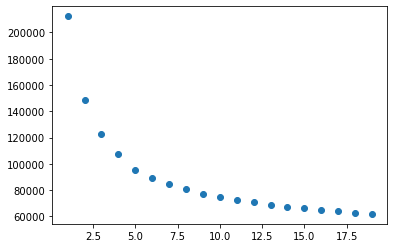

In [44]:
plt.scatter(range(1,20),inertias)

In [49]:
secondDeriv = [0]
for i in range(1,18):
    secondDeriv.append(inertias[i+1] + inertias[i-1] - 2*inertias[i])
secondDeriv.append(0)

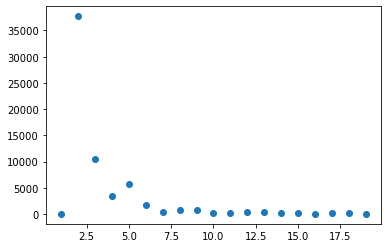

In [52]:
plt.scatter(range(1,20),secondDeriv)

In [53]:
secondDeriv

[0,
 37712.278605067986,
 10508.728752836585,
 3441.8589111833717,
 5773.928112407128,
 1792.2661179049755,
 397.69602741173003,
 789.6040194783418,
 794.3695953439455,
 232.34647953839158,
 95.15195441120886,
 364.4084533158748,
 274.4199491053878,
 117.29894117641379,
 204.75514721876243,
 23.062125257158186,
 95.69030166855373,
 220.14640292983677,
 0]

In [54]:
# Initialize the K-Means model.
model = KMeans(n_clusters=9, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
predictions

array([4, 8, 8, ..., 6, 7, 0])

<AxesSubplot:xlabel='cluster', ylabel='VORP'>

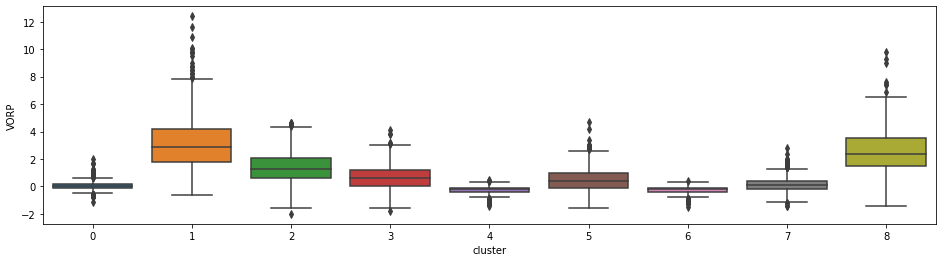

In [56]:
# Visualize clusters based on VORP
import seaborn as sns

cluster_df = pd.DataFrame(predictions, columns=['cluster'])
cluster_vorp = cluster_df.join(a_df)

plt.figure(figsize=(16,4))
sns.boxplot(cluster_vorp['cluster'], cluster_vorp['VORP'])

<AxesSubplot:xlabel='cluster', ylabel='WS'>

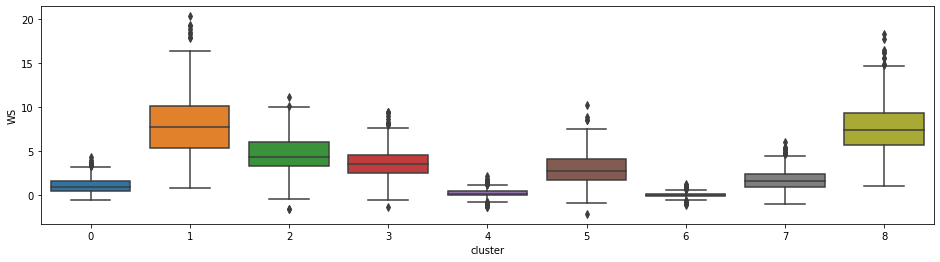

In [57]:
# Visualize clusters based on WS
cluster_df = pd.DataFrame(predictions, columns=['cluster'])
cluster_vorp = cluster_df.join(a_df)

plt.figure(figsize=(16,4))
sns.boxplot(cluster_vorp['cluster'], cluster_vorp['WS'])

In [58]:
cluster_vorp.groupby('cluster').describe()

Year                                                                 \
         count         mean       std     min     25%     50%     75%     max   
cluster                                                                         
0        839.0  2009.972586  4.209940  2003.0  2006.0  2010.0  2013.5  2017.0   
1        462.0  2009.660173  4.302460  2003.0  2006.0  2009.0  2013.0  2017.0   
2        694.0  2011.082133  4.254921  2003.0  2008.0  2011.0  2015.0  2017.0   
3        818.0  2009.808068  4.316271  2003.0  2006.0  2010.0  2014.0  2017.0   
4        856.0  2010.099299  4.375712  2003.0  2006.0  2010.0  2014.0  2017.0   
5        715.0  2009.841958  4.316138  2003.0  2006.0  2010.0  2014.0  2017.0   
6        520.0  2009.153846  4.165574  2003.0  2006.0  2009.0  2013.0  2017.0   
7        925.0  2011.245405  4.162980  2003.0  2008.0  2012.0  2015.0  2017.0   
8        444.0  2009.903153  4.293108  2003.0  2006.0  2010.0  2014.0  2017.0   

           Age                                                          G  \
         count       mean       std   min   25%   50%    75%   max  count   
cluster                                                                     
0        839.0  26.655542  4.370034  18.0  23.0  26.0  30.00  41.0  839.0   
1        462.0  26.216450  3.482947  19.0  24.0  26.0  28.00  36.0  462.0   
2        694.0  26.951009  3.965641  19.0  24.0  26.5  29.00  40.0  694.0   
3        818.0  26.277506  4.050478  19.0  23.0  26.0  29.00  39.0  818.0   
4        856.0  26.502336  4.665413  18.0  23.0  25.0  30.00  39.0  856.0   
5        715.0  26.939860  4.062263  19.0  24.0  27.0  30.00  39.0  715.0   
6        520.0  26.530769  4.769748  18.0  23.0  25.0  30.00  42.0  520.0   
7        925.0  26.983784  4.286639  19.0  23.0  26.0  30.00  39.0  925.0   
8        444.0  26.063063  3.772969  19.0  23.0  26.0  28.25  38.0  444.0   

                                                                MP  \
              mean        std   min   25%   50%   75%   max  count   
cluster                                                              
0        42.755662  17.085595  11.0  29.0  44.0  56.0  82.0  839.0   
1        75.432900   7.292081  46.0  73.0  78.0  81.0  82.0  462.0   
2        74.350144   7.968907  40.0  71.0  77.0  81.0  83.0  694.0   
3        70.211491   9.942454  25.0  64.0  72.0  78.0  82.0  818.0   
4        37.169393  16.658189  11.0  23.0  36.0  50.0  80.0  856.0   
5        68.271329  11.925854  25.0  61.0  71.0  79.0  83.0  715.0   
6        29.048077  14.256783  11.0  18.0  26.0  37.0  81.0  520.0   
7        59.429189  14.695709  13.0  50.0  62.0  71.0  84.0  925.0   
8        75.551802   7.021703  44.0  72.0  78.0  81.0  85.0  444.0   

                                                                            \
                mean         std     min      25%     50%      75%     max   
cluster                                                                      
0         588.594756  312.093299    39.0   342.50   583.0   824.00  1844.0   
1        2711.696970  343.473963  1412.0  2490.25  2763.0  2955.00  3401.0   
2        2203.283862  384.709941  1286.0  1924.00  2191.5  2473.25  3240.0   
3        1612.328851  374.596430   739.0  1329.25  1583.5  1893.50  2575.0   
4         489.307243  298.362338    33.0   247.75   429.0   693.50  1508.0   
5        1769.047552  422.312164   732.0  1466.00  1752.0  2075.00  3118.0   
6         293.801923  220.526042    31.0   124.50   232.5   391.25  1320.0   
7        1132.907027  399.569761   128.0   857.00  1137.0  1426.00  2464.0   
8        2489.265766  332.664178  1530.0  2253.75  2487.0  2705.75  3321.0   

           PER                                                           TS%  \
         count       mean       std   min     25%    50%    75%   max  count   
cluster                                                                        
0        839.0  12.735518  3.497241   2.6  10.400  12.40  14.80  29.6  839.0   
1        462.0

### Creating Cluster Dataset

In [59]:
model.labels_

array([4, 8, 8, ..., 6, 7, 0])

In [60]:
a_df['cluster'] = model.labels_
a_df

,Year,Player,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,3P,3PA,2P,2PA,eFG%,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,year_start,weight,year_born,Status,height(inch),cluster
0,2003,Tariq Abdul-Wahad,28,14,204,12.4,0.470,0.017,0.103,7.6,14.0,10.8,15.4,1.5,1.1,10.3,15.0,0.2,0.2,0.4,0.104,-1.2,0.7,-0.5,0.1,27,58,0,1,27,57,0.466,3,6,14,26,40,21,6,3,7,26,57,1998,223,1974,6,78.0,4
1,2003,Shareef Abdur-Rahim,26,81,3087,19.9,0.566,0.051,0.457,6.7,17.8,12.5,14.7,1.5,0.9,13.0,24.2,7.4,2.3,9.7,0.151,2.1,-0.4,1.7,2.8,566,1183,21,60,545,1123,0.487,455,541,175,502,677,242,87,38,212,240,1608,1997,225,1976,7,81.0,8
2,2004,Shareef Abdur-Rahim,27,85,2684,19.9,0.557,0.032,0.407,8.2,19.0,13.6,12.3,1.4,1.0,12.9,24.4,6.1,2.0,8.1,0.145,1.3,-1.0,0.3,1.6,501,1054,9,34,492,1020,0.480,373,429,189,450,639,174,68,37,184,222,1384,1997,225,1976,8,81.0,8
3,2005,Shareef Abdur-Rahim,28,54,1867,18.7,0.581,0.058,0.379,7.9,16.0,12.1,10.7,1.4,1.0,13.0,22.1,3.9,1.5,5.4,0.139,1.4,-0.5,0.8,1.3,337,670,15,39,322,631,0.514,220,254,123,269,392,111,49,26,117,150,909,1997,225,1976,9,81.0,3
4,2006,Shareef Abdur-Rahim,29,72,1961,17.2,0.588,0.035,0.440,6.4,14.8,10.6,13.2,1.3,1.6,12.5,20.1,4.0,2.2,6.2,0.152,0.4,0.4,0.9,1.4,332,632,5,22,327,610,0.529,218,278,106,251,357,149,48,42,108,227,887,1997,225,1976,10,81.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6268,2017,Troy Williams,22,30,557,8.9,0.511,0.371,0.192,3.0,11.2,7.0,7.0,2.5,1.7,15.4,17.2,-0.4,0.7,0.3,0.030,-3.4,0.7,-2.7,-0.1,73,167,18,62,55,105,0.491,21,32,15,54,69,25,27,10,33,60,185,2017,218,1994,1,79.0,4
6269,2017,Kyle Wiltjer,24,14,44,6.7,0.437,0.929,0.143,9.9,14.9,12.4,6.1,3.3,1.8,25.2,19.1,-0.1,0.1,0.0,-0.039,-4.0,0.0,-4.0,0.0,4,14,4,13,0,1,0.429,1,2,4,6,10,2,3,1,5,4,13,2017,240,1992,1,82.0,6
6270,2017,Stephen Zimmerman,20,19,108,7.3,0.346,0.000,0.161,10.8,24.9,17.6,5.3,0.9,3.7,8.3,14.8,-0.1,0.1,0.0,-0.005,-7.8,0.4,-7.3,-0.1,10,31,0,0,10,31,0.323,3,5,11,24,35,4,2,5,3,17,23,2017,240,1996,1,84.0,6
6271,2017,Paul Zipser,22,44,843,6.9,0.503,0.448,0.181,1.9,14.2,8.0,6.1,0.9,1.5,14.4,14.4,-0.3,0.8,0.5,0.030,-3.6,-0.1,-3.7,-0.4,88,221,33,99,55,122,0.473,31,40,15,110,125,36,15,16,40,78,240,2017,215,1994,1,80.0,7


In [61]:
max(a_df["Status"])

21

In [62]:
cols = ["Player","year_born"]
for i in range(1,22):
    cols.extend([f"Cluster {i}",f"VORP {i}",f"WS {i}"])
b_df = pd.DataFrame(columns = cols)
b_df.head()

,Player,year_born,Cluster 1,VORP 1,WS 1,Cluster 2,VORP 2,WS 2,Cluster 3,VORP 3,WS 3,Cluster 4,VORP 4,WS 4,Cluster 5,VORP 5,WS 5,Cluster 6,VORP 6,WS 6,Cluster 7,VORP 7,WS 7,Cluster 8,VORP 8,WS 8,Cluster 9,VORP 9,WS 9,Cluster 10,VORP 10,WS 10,Cluster 11,VORP 11,WS 11,Cluster 12,VORP 12,WS 12,Cluster 13,VORP 13,WS 13,Cluster 14,VORP 14,WS 14,Cluster 15,VORP 15,WS 15,Cluster 16,VORP 16,WS 16,Cluster 17,VORP 17,WS 17,Cluster 18,VORP 18,WS 18,Cluster 19,VORP 19,WS 19,Cluster 20,VORP 20,WS 20,Cluster 21,VORP 21,WS 21


In [63]:
for index, row in a_df.iterrows():
    subset = a_df[(a_df["Player"]==row["Player"]) & (a_df["year_born"]==row["year_born"])]
    if (subset["Player"].iloc[0],subset["year_born"].iloc[0]) not in zip(b_df["Player"],b_df["year_born"]):
        new_row = {}
        new_row["Player"] = subset["Player"].iloc[0]
        new_row["year_born"] = subset["year_born"].iloc[0]
        for index2, sub in subset.iterrows():
            new_row[f"Cluster {sub['Status']}"] = sub["cluster"]
            new_row[f"VORP {sub['Status']}"] = sub["VORP"]
            new_row[f"WS {sub['Status']}"] = sub["WS"]
        b_df = b_df.append(new_row,ignore_index=True)

In [64]:
b_df

,Player,year_born,Cluster 1,VORP 1,WS 1,Cluster 2,VORP 2,WS 2,Cluster 3,VORP 3,WS 3,Cluster 4,VORP 4,WS 4,Cluster 5,VORP 5,WS 5,Cluster 6,VORP 6,WS 6,Cluster 7,VORP 7,WS 7,Cluster 8,VORP 8,WS 8,Cluster 9,VORP 9,WS 9,Cluster 10,VORP 10,WS 10,Cluster 11,VORP 11,WS 11,Cluster 12,VORP 12,WS 12,Cluster 13,VORP 13,WS 13,Cluster 14,VORP 14,WS 14,Cluster 15,VORP 15,WS 15,Cluster 16,VORP 16,WS 16,Cluster 17,VORP 17,WS 17,Cluster 18,VORP 18,WS 18,Cluster 19,VORP 19,WS 19,Cluster 20,VORP 20,WS 20,Cluster 21,VORP 21,WS 21
0,Tariq Abdul-Wahad,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0.1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Shareef Abdur-Rahim,1976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2.8,9.7,8.0,1.6,8.1,3.0,1.3,5.4,3.0,1.4,6.2,3.0,-0.1,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Courtney Alexander,1977,NaN,NaN,NaN,NaN,NaN,NaN,7.0,-1.2,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Malik Allen,1978,NaN,NaN,NaN,3.0,-1.1,0.9,6.0,-0.4,0.7,0.0,0.0,1.1,0.0,-0.3,1.0,6,-0.5,1.0,7.0,-0.5,1.0,6.0,-0.4,0.3,6.0,-0.3,0.1,6.0,-0.1,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ray Allen,1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.2,9.1,1.0,3.3,6.9,1.0,4.4,10.7,1.0,4.2,9.5,1.0,3.0,6.3,2.0,3.4,9.7,2.0,4.3,11.1,2.0,2.6,7.9,2.0,4.1,10.0,7.0,1.8,4.7,2.0,1.1,5.4,2.0,1.0,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,Troy Williams,1994,4.0,-0.1,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1308,Kyle Wiltjer,1992,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1309,Stephen Zimmerman,1996,6.0,-0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1310,Paul Zipser,1994,7.0,-0.4,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
b_df.to_csv('Resources/clustered_dataset.csv', index=False)

In [65]:
pcs_df

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,-4.413556,0.078321,-0.189577,-0.433237,0.339604,1.320672,0.760859,-1.444257,0.439533,-0.380767
1,8.267804,1.596329,2.108198,1.268506,0.861052,-0.683388,0.181840,-0.900577,-1.004758,0.437697
2,6.602446,2.056001,1.829432,1.543083,0.553429,-0.864643,0.205674,-1.289147,-1.009369,0.017409
3,2.726639,1.324739,0.228503,0.595879,1.345224,-0.236369,0.459030,-1.161928,-0.502820,0.049211
4,3.036963,1.495009,0.097909,0.008390,0.947997,-1.070889,0.159882,-1.085356,-0.106393,0.931028
...,...,...,...,...,...,...,...,...,...,...
6268,-3.418445,-0.870159,-0.326097,-0.758792,0.063439,1.245097,-1.281898,0.157881,0.312268,-0.028022
6269,-5.501041,-0.243123,0.381312,-1.137700,-0.306769,2.451191,-0.032286,1.594885,-0.469758,-1.652125
6270,-5.998198,2.873708,1.882275,2.201836,-1.409239,2.193741,-0.070481,1.108505,0.226639,-0.658685
6271,-3.076889,-0.574885,-0.913042,0.732724,-0.603334,-0.230962,-0.797989,0.792496,0.743523,-0.241511


In [69]:
model.cluster_centers_

array([[-2.91371098e+00,  2.78431523e+00, -3.51640778e-01,
        -5.33782572e-01,  1.01465760e+00,  8.86442970e-02,
         2.27152881e-01,  3.81200533e-01, -9.76987667e-02,
         6.96434776e-02],
       [ 7.08324712e+00, -2.67269674e+00,  1.13601957e+00,
         6.63423660e-02,  9.20932127e-01,  4.42484233e-01,
         5.10620553e-01,  5.72545717e-01, -2.48088313e-02,
         1.61576872e-01],
       [ 2.75309449e+00, -1.42955247e+00, -1.56110783e+00,
         5.25227252e-01, -6.93124657e-01,  9.41002109e-02,
        -7.52495555e-02,  5.94671652e-01, -3.43504571e-01,
         9.20857484e-02],
       [ 1.11461848e+00,  3.34268068e+00, -7.50993999e-02,
        -1.39245282e-01, -2.34466603e-01, -4.47569537e-01,
        -2.97650612e-01, -3.69592013e-01, -5.52607216e-02,
        -7.83288197e-02],
       [-3.88776291e+00, -2.17086248e+00,  7.83029844e-01,
        -2.32476069e-01,  4.95241769e-02,  4.45152491e-02,
        -1.62503240e-01, -4.60126824e-01,  2.63845864e-01,
        -2.

In [70]:
pca.components_

array([[-0.00857863,  0.1971771 ,  0.24547149,  0.13248581, -0.00644652,
         0.03002753, -0.01426161,  0.03714815,  0.01764866,  0.09042095,
         0.03353844,  0.00089247, -0.06164088,  0.13826363,  0.19698134,
         0.05788295,  0.19757292,  0.24991506,  0.24609089,  0.1371467 ,
         0.14136954,  0.2403986 ,  0.23960824,  0.10709374,  0.2293495 ,
         0.23170955,  0.15683585,  0.21675182,  0.20627001,  0.18251222,
         0.21362192,  0.13251745,  0.23479888,  0.20966964,  0.24989289,
         0.00524011, -0.00466892],
       [-0.02315807, -0.00282889, -0.02602029,  0.04012741, -0.24278833,
         0.15402807,  0.30300202,  0.29132241,  0.3201827 , -0.21533826,
        -0.10976865,  0.26288111,  0.03089848, -0.08580523, -0.1037475 ,
         0.2147279 ,  0.02884827, -0.02511716, -0.05775637, -0.20187069,
        -0.20734698,  0.03786926,  0.01909755,  0.05523882, -0.01378401,
         0.01554063,  0.22988476,  0.13818707,  0.17252721, -0.15332323,
        -0.08106

### Resources

In [24]:
### PCA
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
# https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/
# https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c
# https://towardsdatascience.com/redefining-nba-player-classifications-using-clustering-36a348fa54a8